# Importing Libraries and Dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv('mnist_train.csv')
print(d0.head())

l = d0['label'] #save the labels into a variable l

#drop the label feature and store the pixel data in d
d = d0.drop('label',axis=1)    # if print d[i]--> l[i]

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [7]:
print(d.shape)
print(l.shape)

(60000, 784)
(60000,)


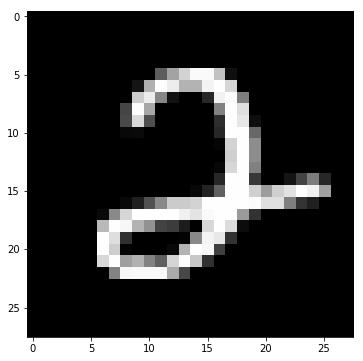

2


In [8]:
# display or plot a number

plt.figure(figsize = (6,6))
index_no = 16
grid_data = d.iloc[index_no].values.reshape(28,28) # reshape from 1D to 2D  #we can also use values in place of as_matrix()

plt.imshow(grid_data,interpolation = "none",cmap="gray") #imshow show images it is in matplotlib and data is grid data color_map=gray

plt.show()
print(l[index_no])

# 2-D Visualization using PCA

In [20]:
labels = l
data = d
print("The shape of sample data=",data.shape)

The shape of sample data= (60000, 784)


# To Standardized data using Scikit-Learn

In [10]:
#data preprocessing :Standardized the data
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

C:\Users\Vishwajeet Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vishwajeet Kumar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(60000, 784)


# Find Co-variance Matrix

In [31]:
#FIND THE COVARIANCE MATRIX WHICH IS : A^T * A
sample_data = standardized_data

#MATRIX MULTIPLICATION USING NUMPY

covar_matrix = (1 / labels.size)*np.matmul(sample_data.T,sample_data)
print("The shape of covariance matrix =",covar_matrix.shape)

The shape of covariance matrix = (784, 784)


# Find Eigen Value and Eigen Vector

In [32]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.
from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.

values, vectors = eigh(covar_matrix, eigvals = (782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [40]:
# projecting the original data sample on the plane 
# formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates = np.matmul(vectors, sample_data.T)
print ("Resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

Resultanat new data points' shape  (2, 784) X (784, 60000)  =  (2, 60000)


In [41]:
# Appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# Creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -4.814790      -0.922159    5.0
1      -7.754403       8.708977    0.0
2       9.431338       2.328389    4.0
3      -3.746318      -6.582173    1.0
4       3.133297      -5.183251    9.0


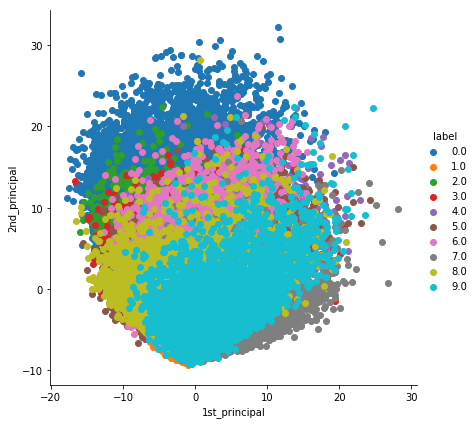

In [42]:
# Ploting the 2-d data points with seaborn
import seaborn as sn

sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# Using PCA from Scikit-Learn

In [43]:
# initializing the pca
from sklearn import decomposition

pca = decomposition.PCA()

In [44]:
# Configuring the Parameteres
# The number of Components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("Shape of pca_reduced.shape = ", pca_data.shape)


Shape of pca_reduced.shape =  (60000, 2)


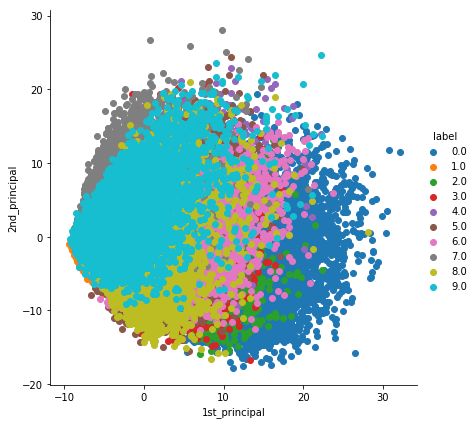

In [45]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data frame which help us in ploting the result data

pca_df = pd.DataFrame(data = pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# To Choose the right dimention d' whose contain the x% of information

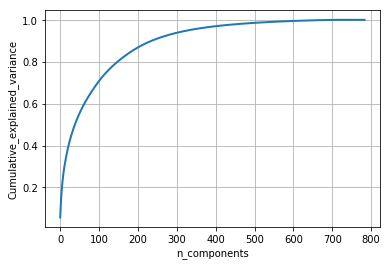

In [46]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

# If we take 200-dimensions, approx. 90% of variance is expalined.